<a href="https://colab.research.google.com/github/bangkitgroupassigment1/Assignment_05/blob/master/Tomato_Health_Condition_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libs needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import tensorflow as tf
from tensorflow.keras import layers
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'category_to_num.csv',
 'New Plant Diseases Dataset(Augmented)',
 'NN_Model.ipynb',
 'playstore.html',
 'playstore.ipynb',
 'README.md',
 'test push Adam.txt',
 'test.csv',
 'Tomato_Health_Condition_Classification.ipynb',
 'tomato_leaves150.npz',
 'tomato_leaves_test100.npz']

# Check Tensorflow Version

In [2]:
tf.__version__

'2.1.0'

# Define a function to get directories name/path

In [3]:
def get_file_path_in_dir(dir_name):
    ''' Get the full path name of files/folders in
    directory specified by path to directory in
    argument "dir_name" and return it as a list

    dir_name is a Path from the directory of your current working script to the folder that you want to
    check all of the subfolder/file
    example:
    pwd
    /usr/Documents
    ls .
    Music
    document.txt

    get_file_path_in_dir('usr/Documents')
    returns
    [/usr/Documents/Music,
    /usr/Documents/document.txt]
    '''
    target_dir = os.listdir(dir_name)
    dir_list = []
    for entry in target_dir:
        full_path = os.path.join(dir_name, entry)
        dir_list.append(full_path)
    
    return dir_list

# Define a function to get folder/file in a directory

In [4]:
def get_sub_dir_names(path_to_dir):
    '''Get the name of all file/folder in a directory specified
    by the path "path_to_dir" and return it as list
    example:
    pwd
    /usr/Documents
    ls .
    Music
    documents.txt

    get_sub_dir_names('usr/Documents')
    returns
    ['Music',
    'documents.txt']

    '''
    subdir_path_list = get_file_path_in_dir(path_to_dir)
    subdir_name_list = []
    for subdir in subdir_path_list:
        subdir_name_list.append(subdir.split("\\")[-1])
    return subdir_name_list

# Get the full path of each subdirectory in a directory specify by the variable train_dir_name
train_dir_name contain path from current working directory(relative path) to the directory containing

In [5]:
# get every path to subfolder/file in train_dir_name folder
train_dir_name = 'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\'
train_data_dir = get_file_path_in_dir(train_dir_name)

In [6]:
tomato_class_list = get_sub_dir_names(train_dir_name)
tomato_class_list

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [7]:
import PIL
from PIL import Image, ImageOps

In [8]:
def image_to_ndarray(path_to_image):
    """read image from the file path name and
    convert the image to np array with dimension of 200x200x3 pixel
    example:
    image_to_ndarray("usr/Documents/fish.jpg")
    returns
    np.array
    where np.array.shape is (100,100,3)
    """
    image = Image.open(path_to_image)
    # Resize image to 100x100 pixel
    image_resize = ImageOps.fit(image, (100, 100), Image.ANTIALIAS)
    data = np.asarray(image_resize)
    return data

# Read Train image dataset to np array
we will also map each label of the image

In [9]:
def read_image_dir_to_np_array(dir_name, class_list):
    """take path to directory name which contains images file,
       read the image into np array, and return list of image and its corresponding label"""
    image_dataset = []
    label = []
    for cla in class_list:
        class_items = get_file_path_in_dir(dir_name+"\\"+cla)
        for item in class_items:
            data = image_to_ndarray(item)
            image_dataset.append(data)
            label.append(cla)

    return image_dataset, label

In [10]:
train_numpy_dataset, label_train = read_image_dir_to_np_array(train_dir_name, tomato_class_list)

# Convert array of image into numpy array
the dimension of the array is as follows: (m, h, w, 3) where m is the number of image, h is the height of each image, w is the width of the image, and 3 is for the number of color channel(RGB)

In [11]:
train_numpy_dataset = np.array(train_numpy_dataset)
train_numpy_dataset.shape

(18345, 100, 100, 3)

In [12]:
# Create set of unique labels and make a dictionary that maps the label to unique integer number
label_unique = list(set(label_train))
label_dict = dict((label, index) for index, label in enumerate(label_unique))
label_df = pd.DataFrame(label_dict.items(), columns=['Tomato Health', 'Health Label'])
label_df.to_csv("category_to_num.csv")

In [13]:
label_dict

{'Tomato___Tomato_mosaic_virus': 0,
 'Tomato___Bacterial_spot': 1,
 'Tomato___Early_blight': 2,
 'Tomato___Spider_mites Two-spotted_spider_mite': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Late_blight': 5,
 'Tomato___Leaf_Mold': 6,
 'Tomato___healthy': 7,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 8,
 'Tomato___Target_Spot': 9}

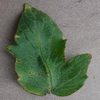

In [14]:
# label_train
Image.fromarray(train_numpy_dataset[1])

In [15]:
# map train label to dictionary value
train_numpy_label = np.array([label_dict[key] for key in label_train])
train_numpy_label

array([1, 1, 1, ..., 8, 8, 8])

In [16]:
train_numpy_label.shape

(18345,)

# Save train dataset and its label as npz file

In [17]:
np.savez("tomato_leaves150.npz", train_numpy_dataset, train_numpy_label)

# Read validate dataset to np array

In [18]:
valid_dir_name = 'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\'
valid_numpy, label_valid = read_image_dir_to_np_array(valid_dir_name, tomato_class_list)
valid_numpy_label = np.array([label_dict[key] for key in label_valid])

In [19]:
# Convert list of validation image matrix into np array
valid_numpy = np.array(valid_numpy)
valid_numpy.shape

(4585, 100, 100, 3)

In [20]:
np.savez("tomato_leaves_test100.npz", valid_numpy, valid_numpy_label)

In [21]:
valid_numpy_label.shape

(4585,)

## Modelling

In [22]:
npz_train = np.load('tomato_leaves150.npz')

In [23]:
x_train = npz_train['arr_0']
y_train = npz_train['arr_1']
y_train.shape

(18345,)

In [24]:
# shuffle training data
index_shuffle = np.random.permutation(len(x_train))
x_train = x_train[index_shuffle]
y_train = y_train[index_shuffle]

In [25]:
npz_test = np.load('tomato_leaves_test100.npz')
x_test = npz_test['arr_0']
y_test = npz_test['arr_1']

In [26]:
# shuffle test data
index_shuffle = np.random.permutation(len(x_test))
x_test = x_test[index_shuffle]
y_test = y_test[index_shuffle]

In [27]:
y_test

array([9, 4, 7, ..., 5, 2, 1])

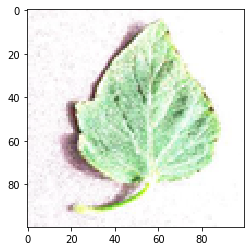

In [28]:
plt.imshow(x_train[20])

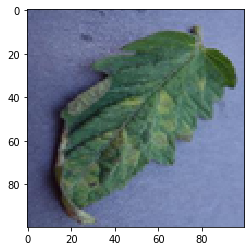

In [29]:
plt.imshow(x_test[20])

In [30]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

## Build a Neural Network

In [31]:
# define plotting loss function

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve one or more classification metrics vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()
  plt.show()

In [32]:
# define deep neural network model
def create_model(learning_rate,neurons_number=270,regularizer=0.15,dropout_rate=0.4):
  """Create and compile deep neural net model"""
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(tf.keras.layers.Flatten(input_shape=(100, 100, 3)))

  # Define the first hidden layer
  model.add(tf.keras.layers.Dense(units=neurons_number,
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(regularizer),
                                  name='Hidden1'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=dropout_rate))

  # Define the output layer
  model.add(tf.keras.layers.Dense(units=10,
                                  activation='softmax',
                                  name='Output'))
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model

In [33]:
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.05):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)
  
  # The list of epochs of the model
  epochs = history.epoch

  # gather a snapshot of the model's mean squared error
  # at each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist

Train on 11007 samples, validate on 7338 samples
Epoch 1/70
11007/11007 [==============================] - 18s 2ms/sample - loss: 79.1646 - accuracy: 0.1902 - val_loss: 75.4838 - val_accuracy: 0.3367
Epoch 2/70
11007/11007 [==============================] - 16s 1ms/sample - loss: 72.2025 - accuracy: 0.2928 - val_loss: 68.8167 - val_accuracy: 0.4116
Epoch 3/70
11007/11007 [==============================] - 15s 1ms/sample - loss: 65.8552 - accuracy: 0.3598 - val_loss: 62.7825 - val_accuracy: 0.4374
Epoch 4/70
11007/11007 [==============================] - 16s 1ms/sample - loss: 60.1131 - accuracy: 0.3853 - val_loss: 57.3185 - val_accuracy: 0.4550
Epoch 5/70
11007/11007 [==============================] - 16s 1ms/sample - loss: 54.8898 - accuracy: 0.4241 - val_loss: 52.3775 - val_accuracy: 0.4357
Epoch 6/70
11007/11007 [==============================] - 15s 1ms/sample - loss: 50.1454 - accuracy: 0.4410 - val_loss: 47.8385 - val_accuracy: 0.4975
Epoch 7/70
11007/11007 [=====================

11007/11007 [==============================] - 12s 1ms/sample - loss: 2.1175 - accuracy: 0.6057 - val_loss: 2.1283 - val_accuracy: 0.5872
Epoch 56/70
11007/11007 [==============================] - 14s 1ms/sample - loss: 2.0645 - accuracy: 0.6053 - val_loss: 2.0299 - val_accuracy: 0.6197
Epoch 57/70
11007/11007 [==============================] - 17s 2ms/sample - loss: 2.0151 - accuracy: 0.6072 - val_loss: 1.9867 - val_accuracy: 0.6308
Epoch 58/70
11007/11007 [==============================] - 13s 1ms/sample - loss: 1.9693 - accuracy: 0.6152 - val_loss: 1.9397 - val_accuracy: 0.6300
Epoch 59/70
11007/11007 [==============================] - 13s 1ms/sample - loss: 1.9354 - accuracy: 0.6087 - val_loss: 1.9383 - val_accuracy: 0.6030
Epoch 60/70
11007/11007 [==============================] - 13s 1ms/sample - loss: 1.8947 - accuracy: 0.6115 - val_loss: 1.8872 - val_accuracy: 0.6058
Epoch 61/70
11007/11007 [==============================] - 13s 1ms/sample - loss: 1.8601 - accuracy: 0.6123 - va

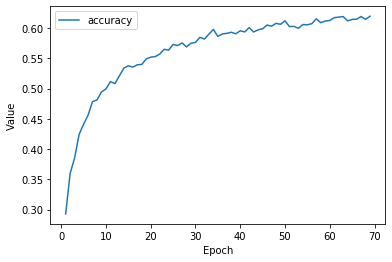

In [34]:
# define the hyperparameters
learning_rate = 0.000008
epochs = 70
batch_size = 150
validation_split = 0.4


# Established model's topography
my_model = create_model(learning_rate)

# Train the model on normalized training set
epochs, hist = train_model(my_model, x_train_norm, y_train, epochs,
                          batch_size, validation_split)

# plot accuracy vs epochs of training
list_of_metrics_to_plot = ['accuracy'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [35]:
my_model.evaluate(x=x_test_norm, y=y_test, batch_size=batch_size)

4585/4585 [==============================] - 2s 521us/sample - loss: 1.6412 - accuracy: 0.6277


[1.6411519827993513, 0.627699]